In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Comparing and evaluating clustering algorithmns

## Evaluating

<p class = 'note'>The most important metrics: 
    <ul>
        <li>ARI (adjust rand index)</li>
        <li>NMI (normalized multual information)</li>
    </ul>
</p>

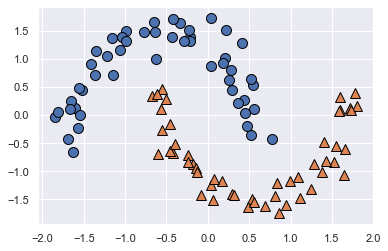

In [19]:
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, MeanShift
from sklearn.preprocessing import StandardScaler
X, y = make_moons(noise = .1, random_state = 0)
X = StandardScaler().fit_transform(X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use avera

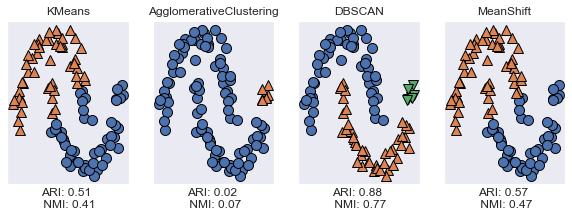

In [24]:
algorithmns = [KMeans(2), AgglomerativeClustering(linkage = 'single'), DBSCAN(eps = .51), MeanShift()]
fig, axes = plt.subplots(1, 4, subplot_kw = {'xticks':[], 'yticks' : []}, figsize = (10, 3))
for clf, ax in zip(algorithmns, axes.flat):
    clf.fit(X)
    mglearn.discrete_scatter(X[:,0], X[:,1], clf.labels_, ax = ax)
    ax.set_title(clf.__class__.__name__)
    ARI = adjusted_rand_score(clf.labels_, y)
    NMI = adjusted_mutual_info_score(clf.labels_, y)
    ax.set_xlabel('ARI: %.2f \n NMI: %.2f' % (ARI, NMI))
    

<h3>Caveat</h3>
<p>Why use <b>ARI</b>, <b>NMI</b> istead of <b>accuracy_score</b>?<br>
Because we care about which point belongs to which cluster, regardless of how we label each cluster
Consider the following example:

In [25]:
from sklearn.metrics import accuracy_score
true_label = [0, 0, 1, 1, 0, 1]
predict_label = [1,1,0,0,1,0]
print('Accuracy score: %.2f' % accuracy_score(true_label, predict_label))
print('ARI: %.2f' % adjusted_rand_score(true_label, predict_label))

Accuracy score: 0.00
ARI: 1.00


## Comparing algorithmns on the faces dataset

In [28]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=60)

Feature extraction: get eigenfaces

In [35]:
from sklearn.decomposition import PCA
vec = PCA(100, whiten = True, random_state = 0)
X, y = vec.fit_transform(people.data), people.target
